In [27]:
import numpy as np
import IPython
import matplotlib.pyplot as plt
from scipy.io import wavfile
from tqdm import tqdm

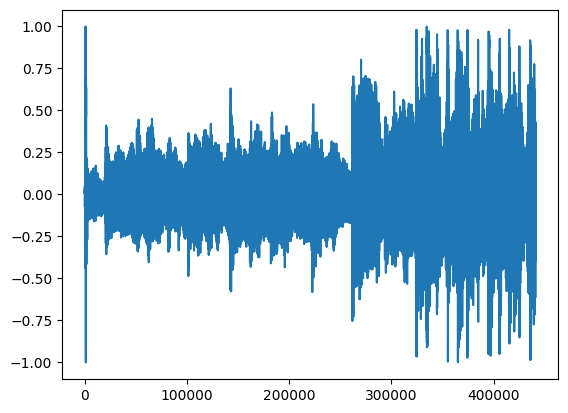

In [14]:
FILENAME = "/home/arden/testaudio/bellona/kyoto10sec.wav"
fs, data = wavfile.read(FILENAME)
data = data.sum(axis=1).astype(np.single)
data /= max(data)
plt.plot(data)

In [18]:
BASE_WAVE = data
BASE_PERIOD = len(data)
transform = np.fft.fft(BASE_WAVE)
NUM_LINES = BASE_PERIOD // 2 + 1
transform = transform[:NUM_LINES]
mags = abs(transform)
phases = np.angle(transform)
freq_scalars = np.array([i for i in range(NUM_LINES)])
mags[1:-1] *= 2
mags /= BASE_PERIOD

In [49]:
positions = np.ones(len(mags), dtype=np.csingle);
positions *= mags
positions *= np.e ** (1j * phases)
rotations = np.arange(len(positions), dtype=np.single)
rotations /= BASE_PERIOD
rotations *= np.pi * 2
output = []
for i in tqdm(range(100 * fs)):
    positions = positions * np.e ** (1j * rotations)
    output.append(np.sum(positions))
output = np.real(np.array(output))
plt.plot(output)
plt.plot(data[:len(output)])
wavfile.write('rotationout.wav', fs, output)

  0%|                                | 14032/4410000 [03:20<17:24:49, 70.12it/s]


KeyboardInterrupt: 

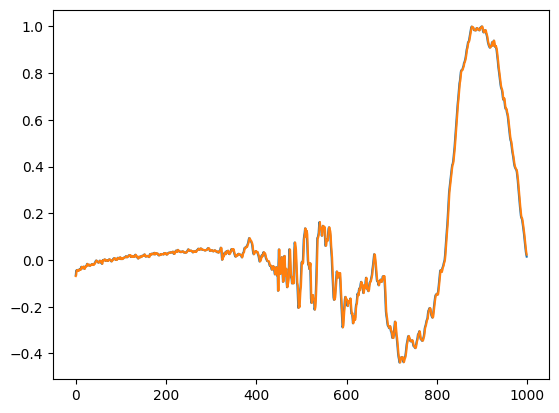

In [17]:
a = np.tile(np.arange(BASE_PERIOD) * 2 * np.pi / BASE_PERIOD, NUM_LINES)
a = np.reshape(a, (NUM_LINES, BASE_PERIOD))
for i in range(NUM_LINES):
    a[i] = (mags[i] * np.cos((freq_scalars[i] * a[i]) + phases[i]) )# + (mags[i] * np.cos((len(transform) - i * a[i]) + phases[i]) / len(transform))
plt.imshow(a)

MemoryError: Unable to allocate 725. GiB for an array with shape (220501, 441000) and data type float64

In [53]:
a = np.array([0.5,1.5,2.7])
a *= 2
a = np.round(a)

In [54]:
a / 2

array([0.5, 1.5, 2.5])